<a href="https://colab.research.google.com/github/muskan661/Muskan/blob/main/MuskanAmatya_Week5_TECH405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [32]:
data=pd.read_csv("/content/cities.csv")

In [33]:
data.head()

,station_id,city_name,country,state,iso2,iso3,latitude,longitude
0,41515,Asadabad,Afghanistan,Kunar,AF,AFG,34.866000,71.150005
1,38954,Fayzabad,Afghanistan,Badakhshan,AF,AFG,37.129761,70.579247
2,41560,Jalalabad,Afghanistan,Nangarhar,AF,AFG,34.441527,70.436103
3,38947,Kunduz,Afghanistan,Kunduz,AF,AFG,36.727951,68.872530
4,38987,Qala i Naw,Afghanistan,Badghis,AF,AFG,34.983000,63.133300


In [34]:
data.shape

(1245, 8)

In [35]:
data.set_index(data.columns[0], inplace=True)
data = data.transpose()
print("Transposed Data:\n", data.head())

Transposed Data:
 station_id        41515        38954        41560        38947        38987  \
city_name      Asadabad     Fayzabad    Jalalabad       Kunduz   Qala i Naw   
country     Afghanistan  Afghanistan  Afghanistan  Afghanistan  Afghanistan   
state             Kunar   Badakhshan    Nangarhar       Kunduz      Badghis   
iso2                 AF           AF           AF           AF           AF   
iso3                AFG          AFG          AFG          AFG          AFG   

station_id        38915     13577    13461    13615    60620  ...  \
city_name    Sheberghan  Peshkopi  Shkodër   Tirana    Adrar  ...   
country     Afghanistan   Albania  Albania  Albania  Algeria  ...   
state           Jawzjan     Dibër  Shkodër   Durrës    Adrar  ...   
iso2                 AF        AL       AL       AL       DZ  ...   
iso3                AFG       ALB      ALB      ALB      DZA  ...   

station_id              91753           60035    41140    67581    67663  \
city_name       

In [36]:
data = data.apply(pd.to_numeric, errors='coerce')

data = data.dropna()

data = data.transpose()

In [37]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [38]:
def create_sequences(dataset, seq_length):
    X, y = [], []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i + seq_length])
        y.append(dataset[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 5  # Number of time steps
X, y = create_sequences(scaled_data, seq_length)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the RNN
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, X.shape[2]), return_sequences=True), # Added return_sequences=True to SimpleRNN
    LSTM(100, activation='tanh', return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Step 6: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1160 - mae: 0.2735 - val_loss: 0.0317 - val_mae: 0.1405
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0330 - mae: 0.1442 - val_loss: 0.0272 - val_mae: 0.1306
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0290 - mae: 0.1363 - val_loss: 0.0271 - val_mae: 0.1299
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0297 - mae: 0.1350 - val_loss: 0.0267 - val_mae: 0.1287
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0278 - mae: 0.1314 - val_loss: 0.0267 - val_mae: 0.1291
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0281 - mae: 0.1325 - val_loss: 0.0261 - val_mae: 0.1273
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0275 - mae: 0.1306 - val_loss: 0.0257 - val_mae: 0.1261
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0264 - mae: 0.1291 - val_loss: 0.0255 - val_mae: 0.1256
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.028

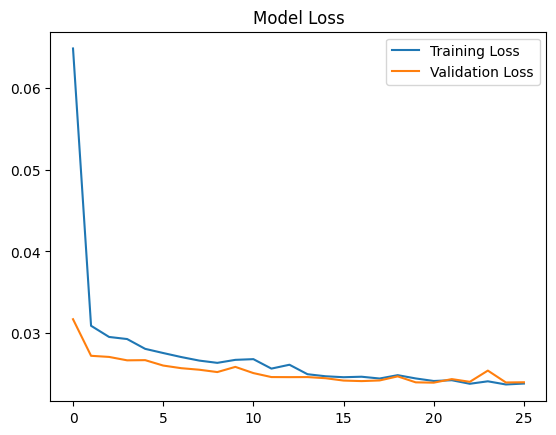

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


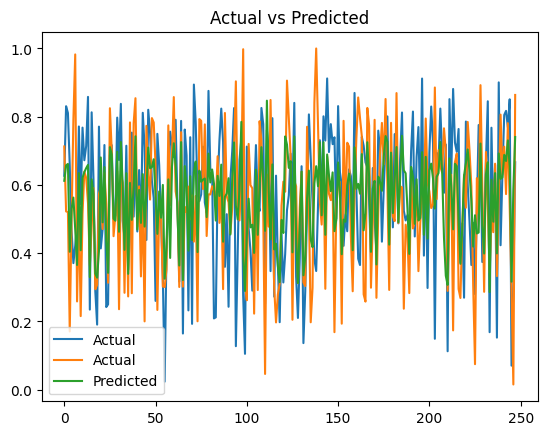

In [48]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

y_pred = model.predict(X_test)
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

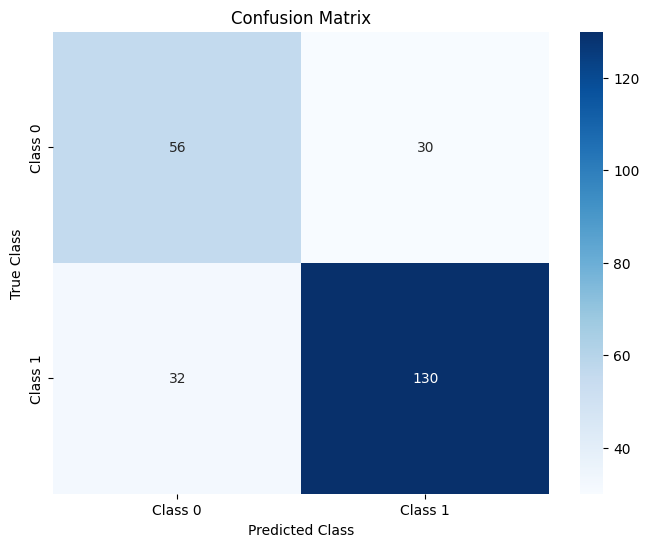

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.65      0.64        86
           1       0.81      0.80      0.81       162

    accuracy                           0.75       248
   macro avg       0.72      0.73      0.73       248
weighted avg       0.75      0.75      0.75       248



In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 8: Add Confusion Matrix and Classification Report
# Define a threshold for classification (example: classify as 1 if predicted value > 0.5, otherwise 0)
threshold = 0.5

# Assuming y_test has 2 columns and the target variable is in the first column (index 0)
# Select only the target variable column from y_test
y_test_target = y_test[:, 0]  # Select the first column of y_test

# Convert predictions and true values to binary classes
y_pred_classes = (y_pred > threshold).astype(int).flatten()
y_test_classes = (y_test_target > threshold).astype(int)  # No need to flatten here

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Print the classification report
print("Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes))